c:\code\Freemocap566\reachTask\processed_clicks\ro_0125_Y_savedclicks.csv


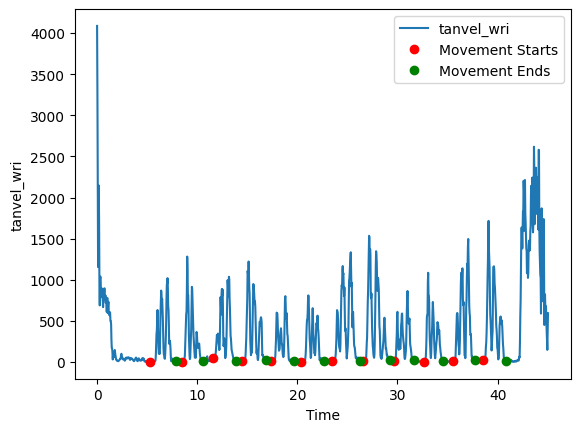

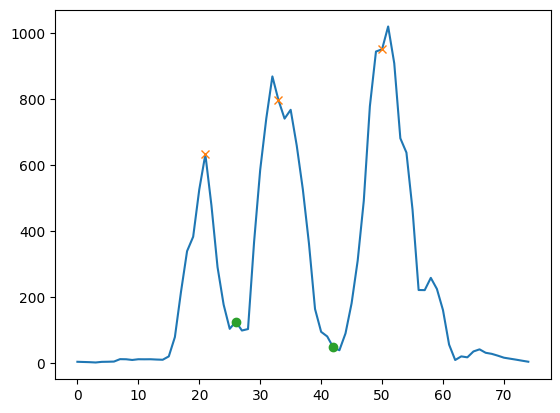

[21 33 50] [26 42]


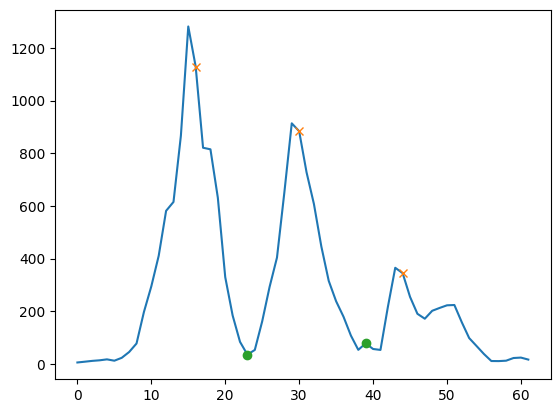

[16 30 44] [23 39]


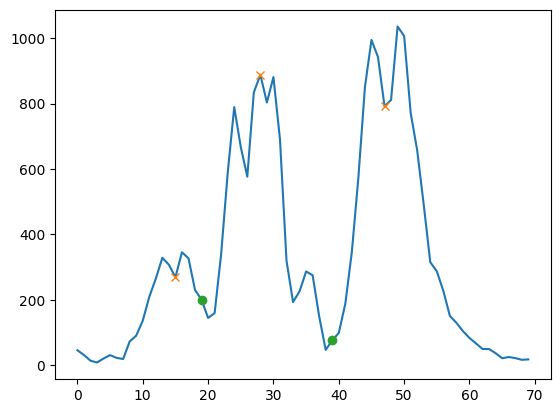

[15 28 47] [19 39]


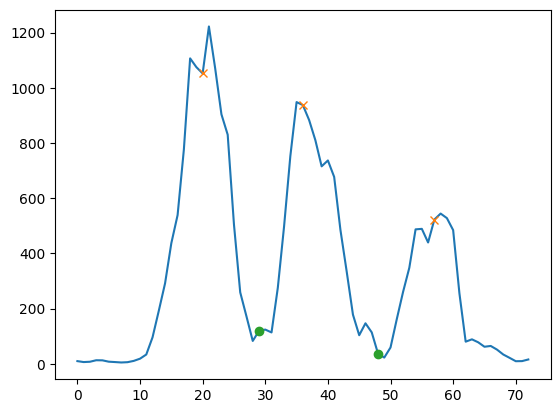

[20 36 57] [29 48]


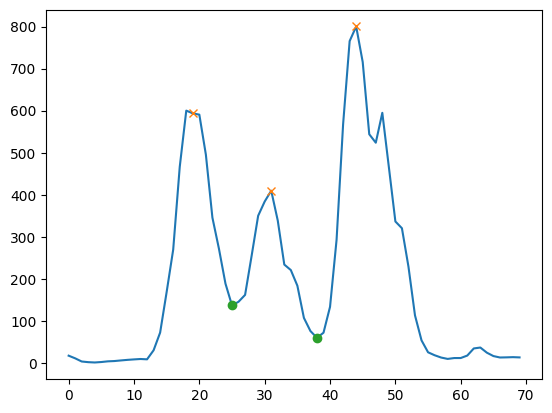

[19 31 44] [25 38]


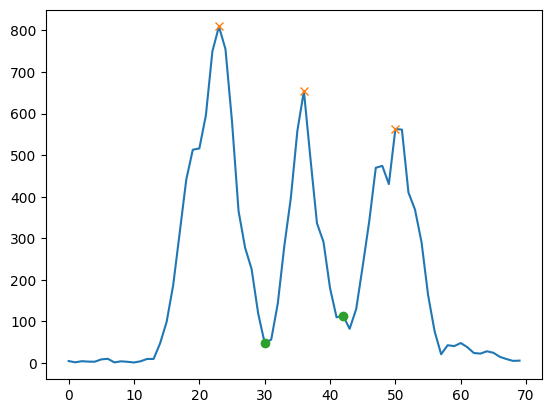

[23 36 50] [30 42]


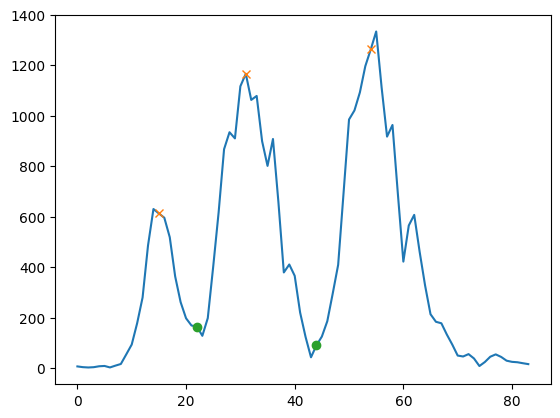

[15 31 54] [22 44]


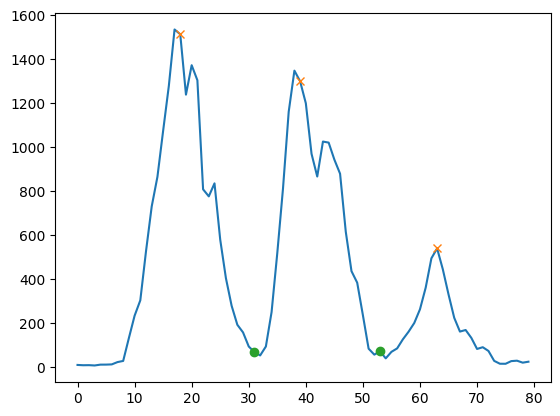

[18 39 63] [31 53]


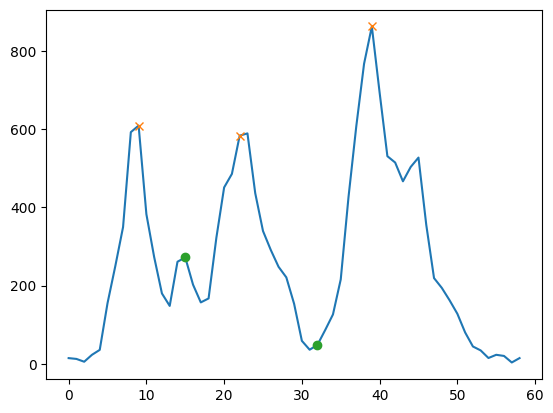

[ 9 22 39] [15 32]


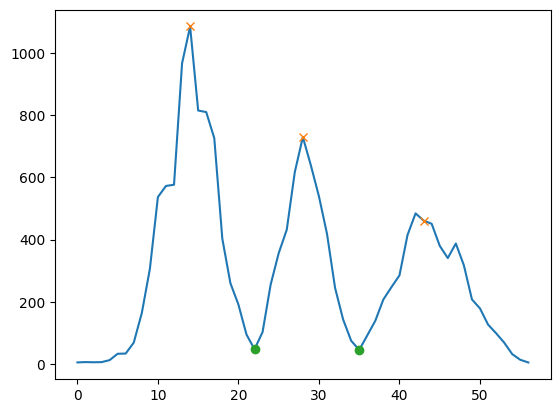

[14 28 43] [22 35]


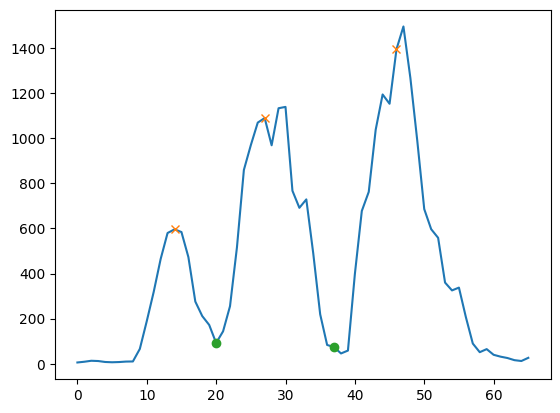

[14 27 46] [20 37]


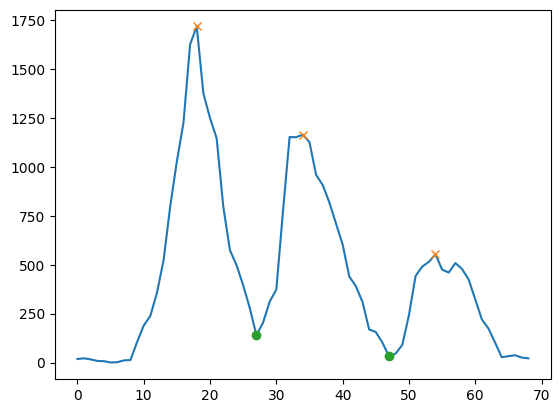

[18 34 54] [27 47]


(0.0, 1.5)

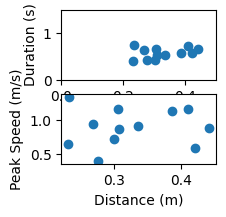

In [1]:
import math
import sys, os
sys.path.append(os.path.join(os.getcwd()))
import freemocapAnalysis as fa
import reach_fmc as rf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy.signal import find_peaks
# %matplotlib widget
# then you can do importlib.reload(rf) to reload the module

## here are hopefully the only two things you need to set.
sname = 'ro_0125_Y' # at the moment, 'je' and 'ro' are the only clean datasets that i can tell. and ro is short. 
datapath = fa.setdatapath("rom") 
## /here are hopefully the only two things you need to set.

fnames = fa.get_list_subject_files(sname,datapath)
pddata = pd.read_csv(fnames[0])
reachr = rf.reachData(pddata)

# click the starts and ends
reachr.click_add_wrist_starts_ends(numclicks=24,sname=sname)

# plot the return values
plt.plot(reachr.time,reachr.tanvel_wri)
plt.plot(reachr.time[reachr.mov_starts], reachr.tanvel_wri[reachr.mov_starts], 'ro')
plt.plot(reachr.time[reachr.mov_ends], reachr.tanvel_wri[reachr.mov_ends], 'go')
plt.xlabel('Time')
plt.ylabel('tanvel_wri')
plt.legend(['tanvel_wri', 'Movement Starts', 'Movement Ends'])
plt.show()

# call reach_fmc.peaks_and_valleys to find the peaks and valleys of the mov_starts and mov_ends
distances,durations,peakspeeds, ind_mmoves = reachr.mainsequence()

#% plot the dist peakspeed
fig,ax = plt.subplots(2,1)
#set plot size
fig.set_size_inches(2,2)
ax[0].plot(distances/1000.0,durations,'o')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Duration (s)')
#set xlimit
ax[0].set_xlim([0,.5])
ax[0].set_ylim([0,1.0])
ax[1].plot(distances/1000,peakspeeds/1000,'o')
ax[1].set_xlabel('Distance (m)')
ax[1].set_ylabel('Peak Speed (m/s)')
ax[0].set_xlim([0,0.5])
ax[0].set_ylim([0,1.5])
#%

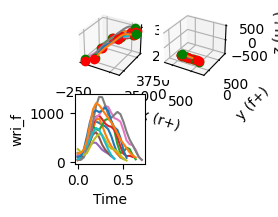

In [2]:
# plot wri_f[0,mov_starts[i]:mov_ends[i]] for all mov_starts
fig = plt.figure()
fig.set_size_inches(2,2)
tv_sm = fa.lowpass(reachr.tanvel_wri, fs=30, cutoff_freq = 8)
tgts = list()
ax_3d    = fig.add_subplot(221,projection='3d')
ax_3dr  = fig.add_subplot(222,projection='3d')
ax_tv   = fig.add_subplot(223) 

total_distances = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance - start_distance

  # Append the total to the list
  total_distances.append(total)
  
  R2calxy = np.array([[-0.689578  , -0.72413109, -0.01078618],
       [ 0.66407996, -0.62631008, -0.40833013],
       [ 0.28892905, -0.28873836,  0.9127706 ]])
  
  # zero the movements to the first shoulder position
  sho0 = reachr.sho_f[:,reachr.mov_starts[0:1]]
  wri_f = reachr.wri_f[:,inds]
  wri_f = wri_f - sho0
  # now rotate the vectors
  wri_r = np.dot(R2calxy,wri_f)
  ax_3dr.plot(wri_r[0,:], wri_r[1,:], wri_r[2,:])
  tgt_start = wri_r[:,0]
  tgt_end = wri_r[:,-1]
  ax_3dr.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3dr.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  ax_3dr.set_xlabel('x (r+)')
  ax_3dr.set_ylabel('y (f+)')
  ax_3dr.set_zlabel('z (u+)')
  ax_3dr.set_xlim([-200,800])
  ax_3dr.set_ylim([-200,800])
  ax_3dr.set_zlim([-500,500])

  t = reachr.time[inds]
  t = t-t[0]
  
  ax_tv.plot(t,tv_sm[inds])
  
plt.xlabel('Time')
plt.ylabel('wri_f')
plt.show()

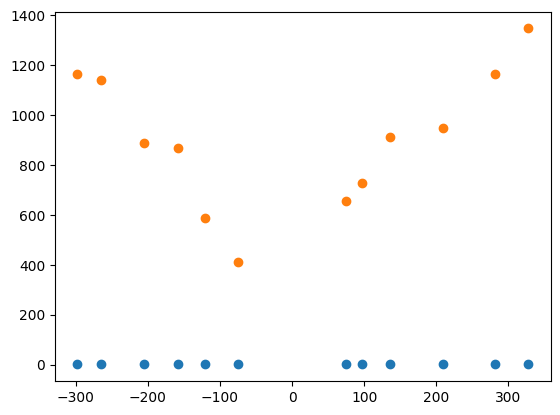

In [3]:
plt.plot(total_distances, durations, 'o')
plt.plot(total_distances, peakspeeds, 'o')
plt.show()

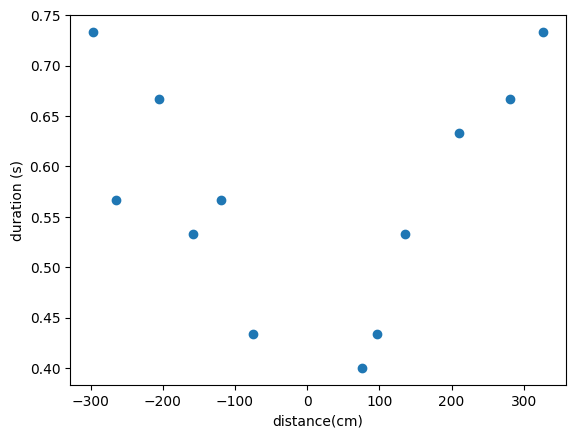

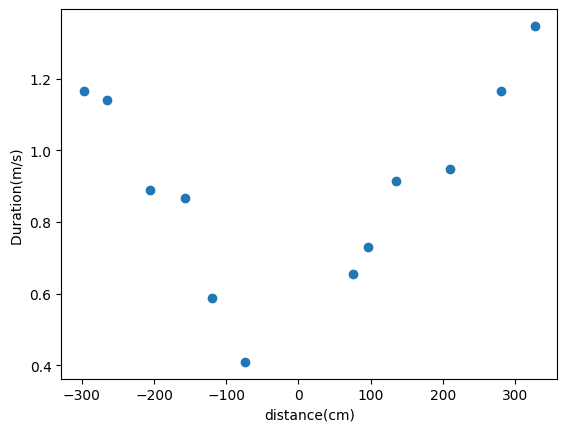

In [4]:
plt.plot(total_distances, durations, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(total_distances, peakspeeds/1000, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('Duration(m/s) ')
plt.show()

In [5]:
total_distances = total_distances/100
plt.plot(total_distances, durations, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(total_distances, peakspeeds/1000, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('Duration(m/s) ')
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

c:\code\Freemocap566\reachTask\processed_clicks\ro_0125_Y_savedclicks.csv


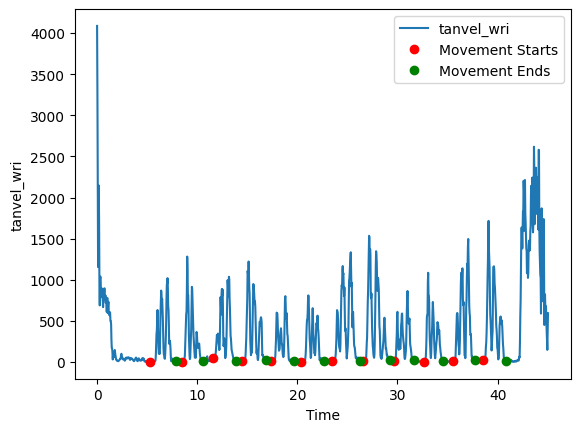

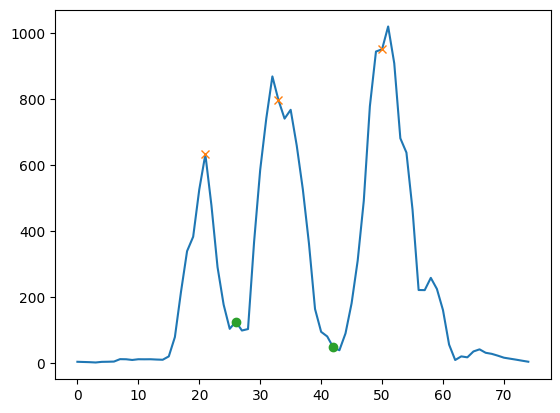

[21 33 50] [26 42]


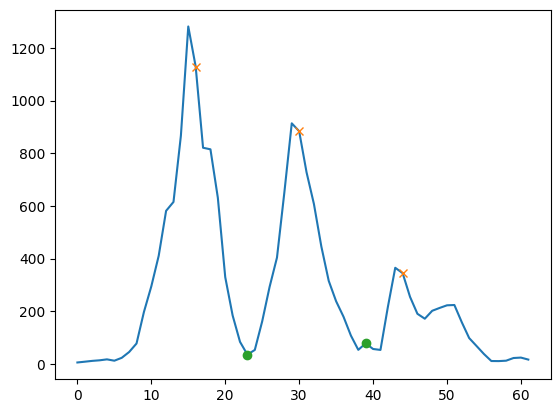

[16 30 44] [23 39]


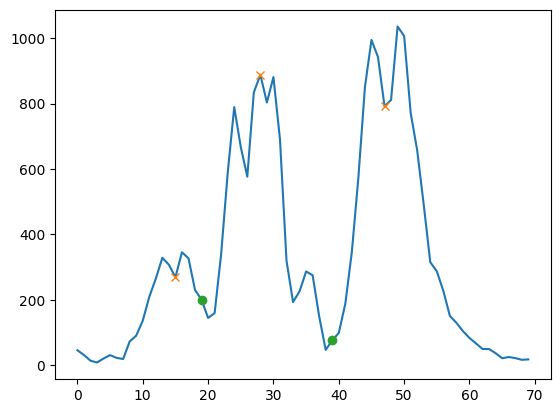

[15 28 47] [19 39]


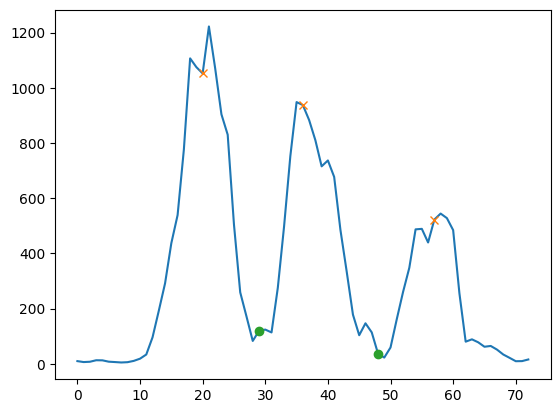

[20 36 57] [29 48]


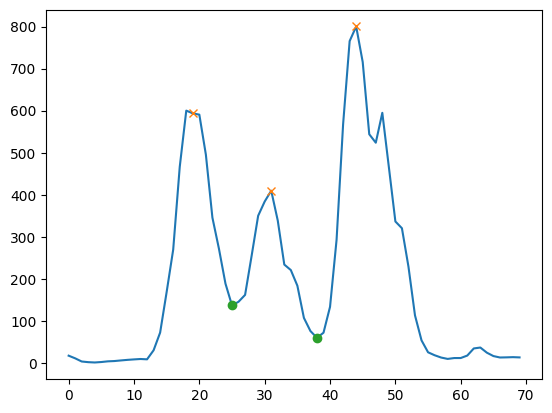

[19 31 44] [25 38]


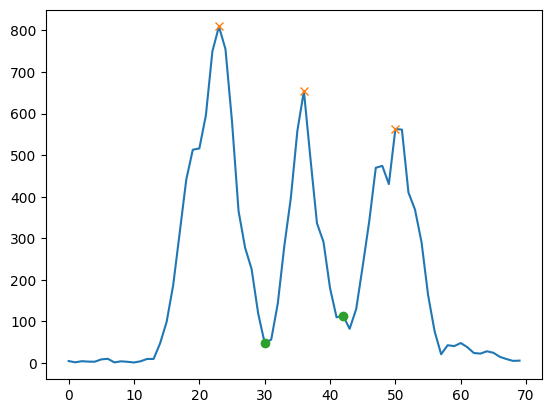

[23 36 50] [30 42]


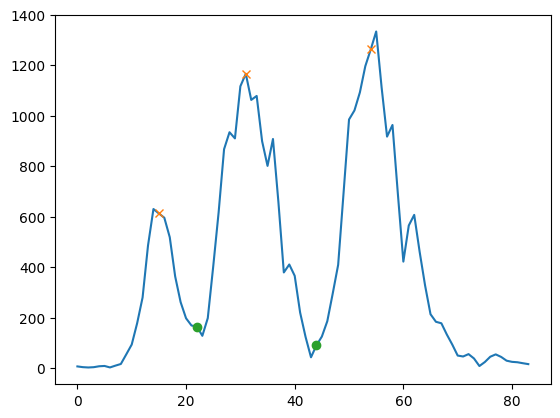

[15 31 54] [22 44]


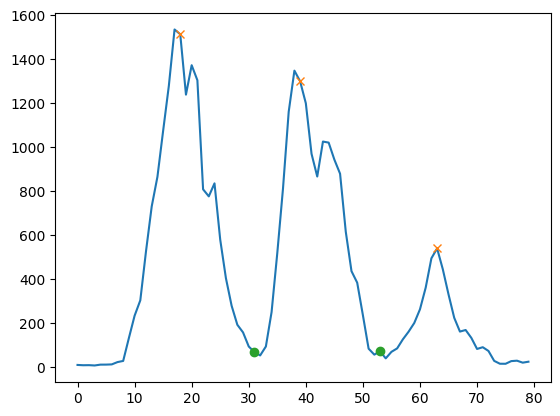

[18 39 63] [31 53]


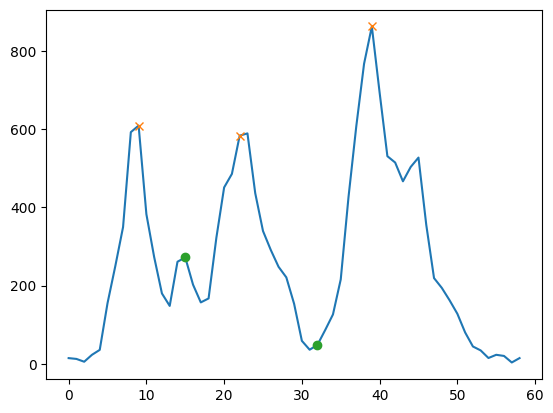

[ 9 22 39] [15 32]


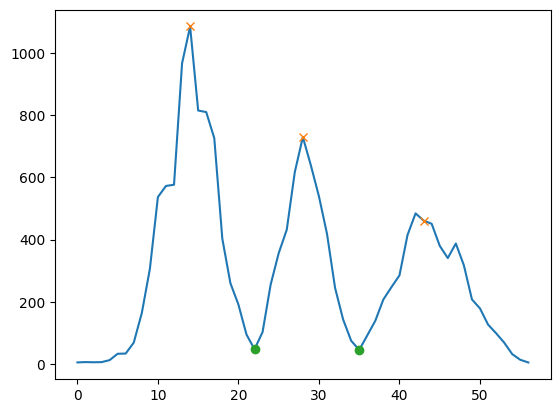

[14 28 43] [22 35]


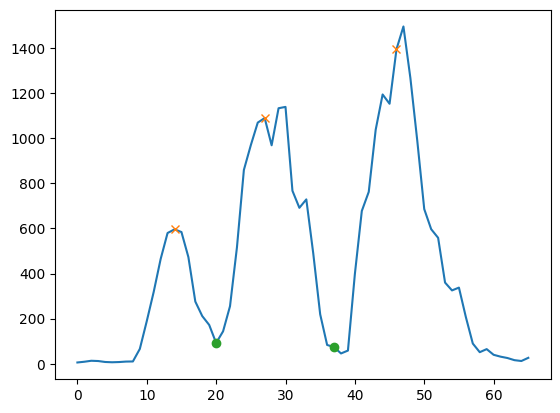

[14 27 46] [20 37]


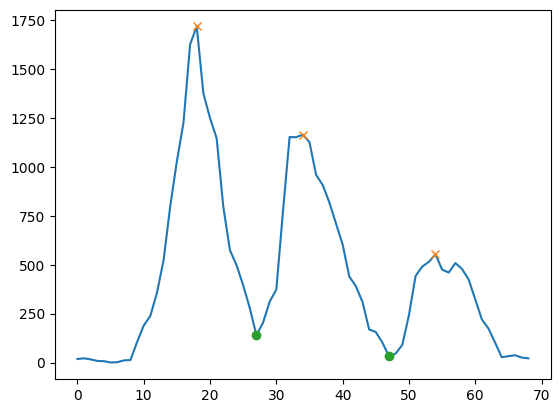

[18 34 54] [27 47]


(0.0, 1.5)

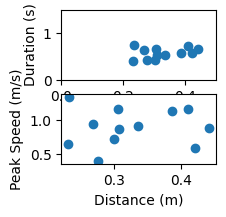

In [6]:
import math
import sys, os
sys.path.append(os.path.join(os.getcwd()))
import freemocapAnalysis as fa
import reach_fmc as rf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy.signal import find_peaks
# %matplotlib widget
# then you can do importlib.reload(rf) to reload the module

## here are hopefully the only two things you need to set.
sname = 'ro_0125_Y' # at the moment, 'je' and 'ro' are the only clean datasets that i can tell. and ro is short. 
datapath = fa.setdatapath("rom") 
## /here are hopefully the only two things you need to set.

fnames = fa.get_list_subject_files(sname,datapath)
pddata = pd.read_csv(fnames[0])
reachr = rf.reachData(pddata)

# click the starts and ends
reachr.click_add_wrist_starts_ends(numclicks=24,sname=sname)

# plot the return values
plt.plot(reachr.time,reachr.tanvel_wri)
plt.plot(reachr.time[reachr.mov_starts], reachr.tanvel_wri[reachr.mov_starts], 'ro')
plt.plot(reachr.time[reachr.mov_ends], reachr.tanvel_wri[reachr.mov_ends], 'go')
plt.xlabel('Time')
plt.ylabel('tanvel_wri')
plt.legend(['tanvel_wri', 'Movement Starts', 'Movement Ends'])
plt.show()

# call reach_fmc.peaks_and_valleys to find the peaks and valleys of the mov_starts and mov_ends
distances,durations,peakspeeds, ind_mmoves = reachr.mainsequence()

#% plot the dist peakspeed
fig,ax = plt.subplots(2,1)
#set plot size
fig.set_size_inches(2,2)
ax[0].plot(distances/1000.0,durations,'o')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Duration (s)')
#set xlimit
ax[0].set_xlim([0,.5])
ax[0].set_ylim([0,1.0])
ax[1].plot(distances/1000,peakspeeds/1000,'o')
ax[1].set_xlabel('Distance (m)')
ax[1].set_ylabel('Peak Speed (m/s)')
ax[0].set_xlim([0,0.5])
ax[0].set_ylim([0,1.5])
#%

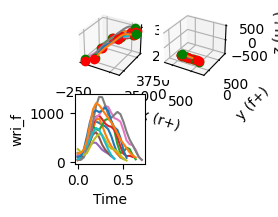

In [7]:
# plot wri_f[0,mov_starts[i]:mov_ends[i]] for all mov_starts
fig = plt.figure()
fig.set_size_inches(2,2)
tv_sm = fa.lowpass(reachr.tanvel_wri, fs=30, cutoff_freq = 8)
tgts = list()
ax_3d    = fig.add_subplot(221,projection='3d')
ax_3dr  = fig.add_subplot(222,projection='3d')
ax_tv   = fig.add_subplot(223) 

total_distances = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000

  # Append the total to the list
  total_distances.append(total)
  
  R2calxy = np.array([[-0.689578  , -0.72413109, -0.01078618],
       [ 0.66407996, -0.62631008, -0.40833013],
       [ 0.28892905, -0.28873836,  0.9127706 ]])
  
  # zero the movements to the first shoulder position
  sho0 = reachr.sho_f[:,reachr.mov_starts[0:1]]
  wri_f = reachr.wri_f[:,inds]
  wri_f = wri_f - sho0
  # now rotate the vectors
  wri_r = np.dot(R2calxy,wri_f)
  ax_3dr.plot(wri_r[0,:], wri_r[1,:], wri_r[2,:])
  tgt_start = wri_r[:,0]
  tgt_end = wri_r[:,-1]
  ax_3dr.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3dr.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  ax_3dr.set_xlabel('x (r+)')
  ax_3dr.set_ylabel('y (f+)')
  ax_3dr.set_zlabel('z (u+)')
  ax_3dr.set_xlim([-200,800])
  ax_3dr.set_ylim([-200,800])
  ax_3dr.set_zlim([-500,500])

  t = reachr.time[inds]
  t = t-t[0]
  
  ax_tv.plot(t,tv_sm[inds])
  
plt.xlabel('Time')
plt.ylabel('wri_f')
plt.show()

c:\code\Freemocap566\reachTask\processed_clicks\ro_0125_Y_savedclicks.csv


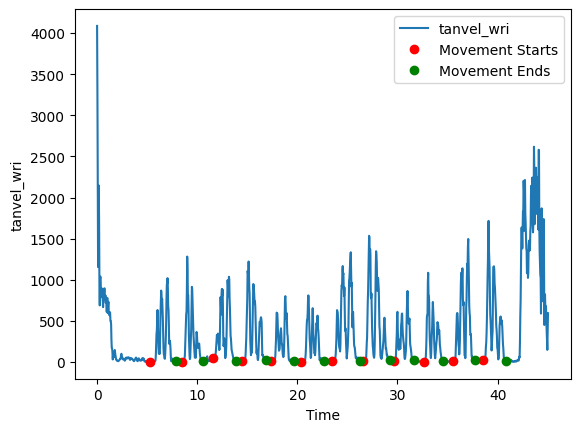

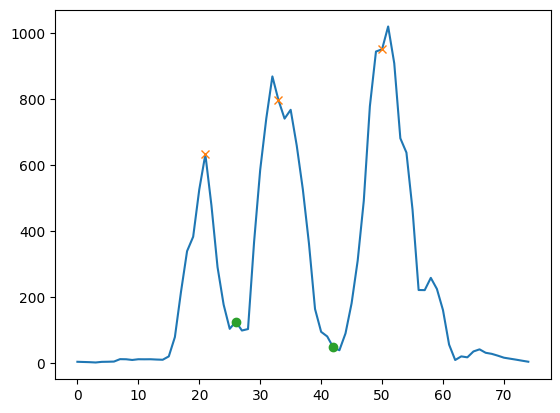

[21 33 50] [26 42]


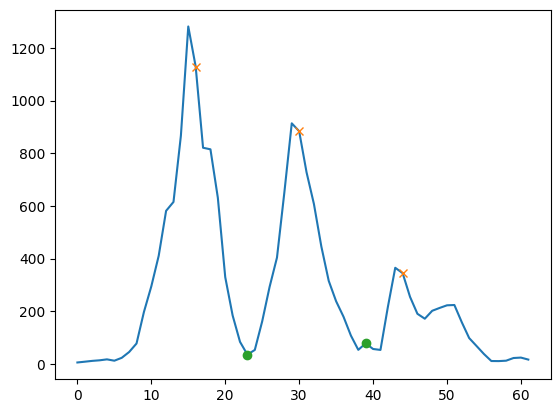

[16 30 44] [23 39]


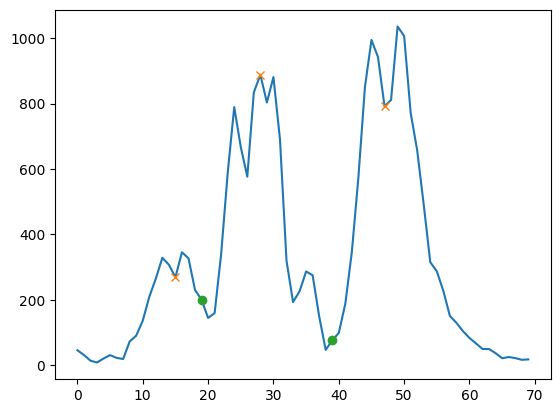

[15 28 47] [19 39]


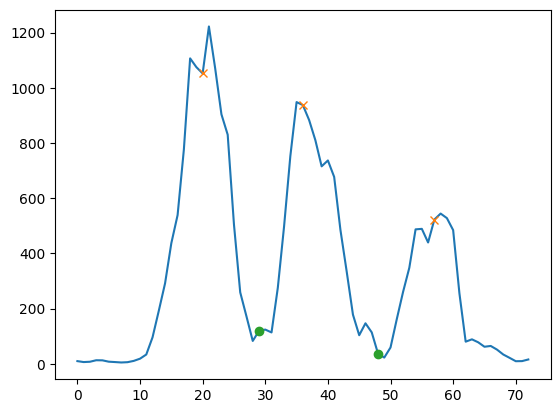

[20 36 57] [29 48]


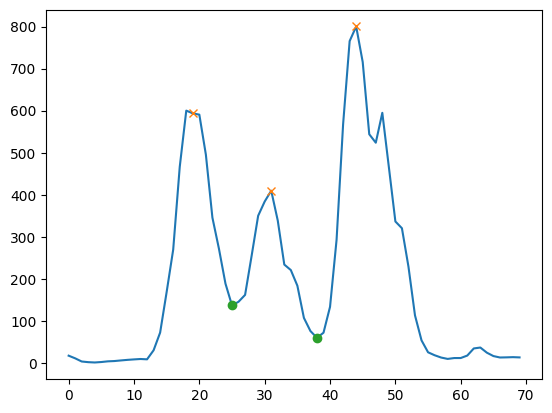

[19 31 44] [25 38]


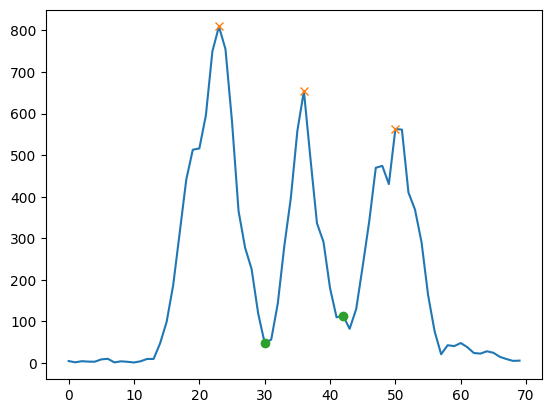

[23 36 50] [30 42]


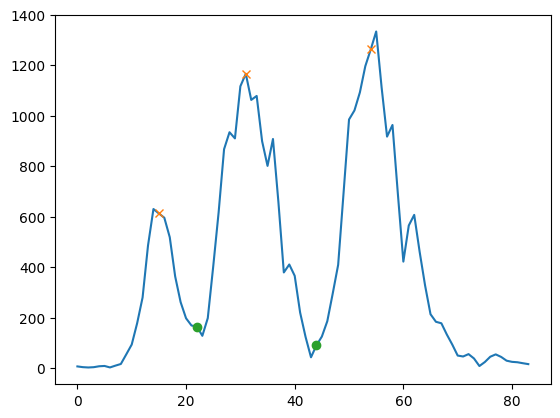

[15 31 54] [22 44]


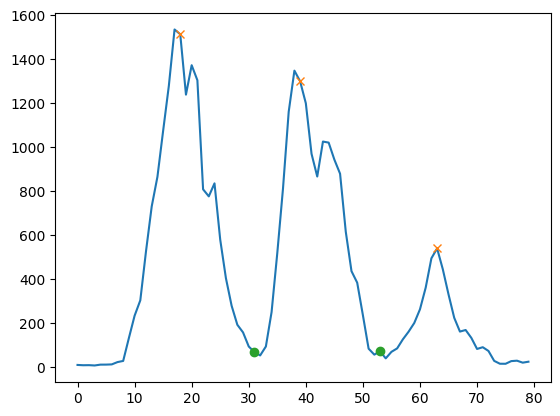

[18 39 63] [31 53]


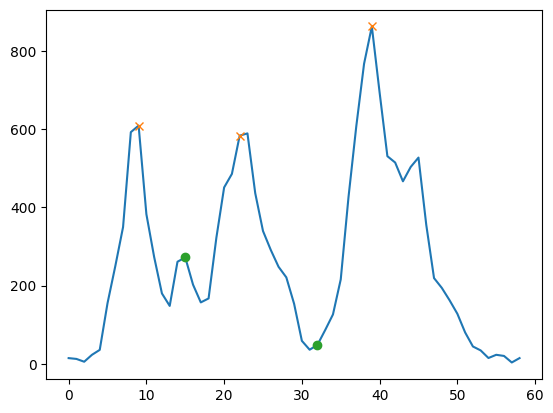

[ 9 22 39] [15 32]


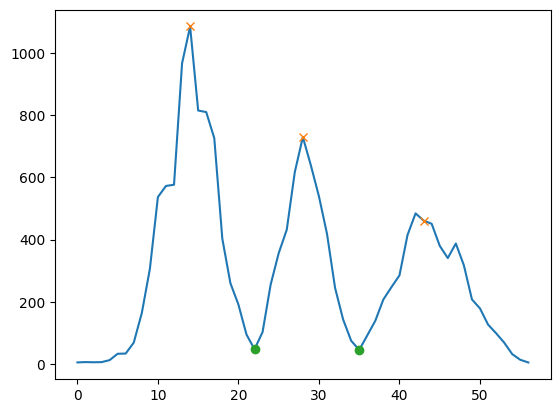

[14 28 43] [22 35]


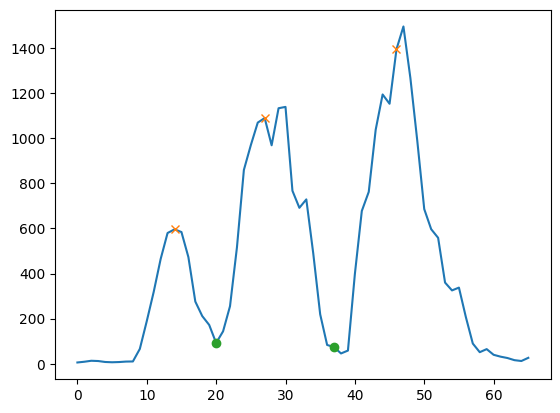

[14 27 46] [20 37]


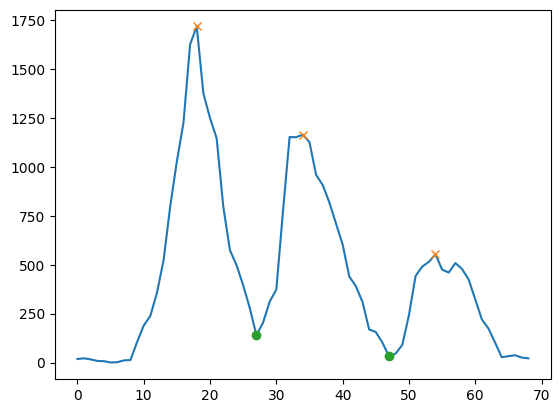

[18 34 54] [27 47]


(0.0, 1.5)

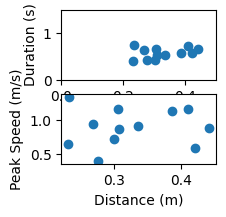

In [8]:
import math
import sys, os
sys.path.append(os.path.join(os.getcwd()))
import freemocapAnalysis as fa
import reach_fmc as rf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy.signal import find_peaks
# %matplotlib widget
# then you can do importlib.reload(rf) to reload the module

## here are hopefully the only two things you need to set.
sname = 'ro_0125_Y' # at the moment, 'je' and 'ro' are the only clean datasets that i can tell. and ro is short. 
datapath = fa.setdatapath("rom") 
## /here are hopefully the only two things you need to set.

fnames = fa.get_list_subject_files(sname,datapath)
pddata = pd.read_csv(fnames[0])
reachr = rf.reachData(pddata)

# click the starts and ends
reachr.click_add_wrist_starts_ends(numclicks=24,sname=sname)

# plot the return values
plt.plot(reachr.time,reachr.tanvel_wri)
plt.plot(reachr.time[reachr.mov_starts], reachr.tanvel_wri[reachr.mov_starts], 'ro')
plt.plot(reachr.time[reachr.mov_ends], reachr.tanvel_wri[reachr.mov_ends], 'go')
plt.xlabel('Time')
plt.ylabel('tanvel_wri')
plt.legend(['tanvel_wri', 'Movement Starts', 'Movement Ends'])
plt.show()

# call reach_fmc.peaks_and_valleys to find the peaks and valleys of the mov_starts and mov_ends
distances,durations,peakspeeds, ind_mmoves = reachr.mainsequence()

#% plot the dist peakspeed
fig,ax = plt.subplots(2,1)
#set plot size
fig.set_size_inches(2,2)
ax[0].plot(distances/1000.0,durations,'o')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Duration (s)')
#set xlimit
ax[0].set_xlim([0,.5])
ax[0].set_ylim([0,1.0])
ax[1].plot(distances/1000,peakspeeds/1000,'o')
ax[1].set_xlabel('Distance (m)')
ax[1].set_ylabel('Peak Speed (m/s)')
ax[0].set_xlim([0,0.5])
ax[0].set_ylim([0,1.5])
#%

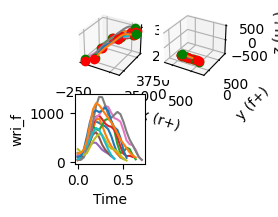

In [9]:
# plot wri_f[0,mov_starts[i]:mov_ends[i]] for all mov_starts
fig = plt.figure()
fig.set_size_inches(2,2)
tv_sm = fa.lowpass(reachr.tanvel_wri, fs=30, cutoff_freq = 8)
tgts = list()
ax_3d    = fig.add_subplot(221,projection='3d')
ax_3dr  = fig.add_subplot(222,projection='3d')
ax_tv   = fig.add_subplot(223) 

total_distances = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000

  # Append the total to the list
  total_distances.append(total)
  
  R2calxy = np.array([[-0.689578  , -0.72413109, -0.01078618],
       [ 0.66407996, -0.62631008, -0.40833013],
       [ 0.28892905, -0.28873836,  0.9127706 ]])
  
  # zero the movements to the first shoulder position
  sho0 = reachr.sho_f[:,reachr.mov_starts[0:1]]
  wri_f = reachr.wri_f[:,inds]
  wri_f = wri_f - sho0
  # now rotate the vectors
  wri_r = np.dot(R2calxy,wri_f)
  ax_3dr.plot(wri_r[0,:], wri_r[1,:], wri_r[2,:])
  tgt_start = wri_r[:,0]
  tgt_end = wri_r[:,-1]
  ax_3dr.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3dr.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  ax_3dr.set_xlabel('x (r+)')
  ax_3dr.set_ylabel('y (f+)')
  ax_3dr.set_zlabel('z (u+)')
  ax_3dr.set_xlim([-200,800])
  ax_3dr.set_ylim([-200,800])
  ax_3dr.set_zlim([-500,500])

  t = reachr.time[inds]
  t = t-t[0]
  
  ax_tv.plot(t,tv_sm[inds])
  
plt.xlabel('Time')
plt.ylabel('wri_f')
plt.show()

In [10]:
print(total_distances
)

[-0.15763315723547544, 0.13555534424955296, -0.20537758180497967, 0.2097399528009274, -0.07455250183695306, 0.07545547710282419, -0.2974083123409148, 0.327452244075392, -0.12008649710319608, 0.09705875809887976, -0.2653811894379179, 0.28118322090060843]


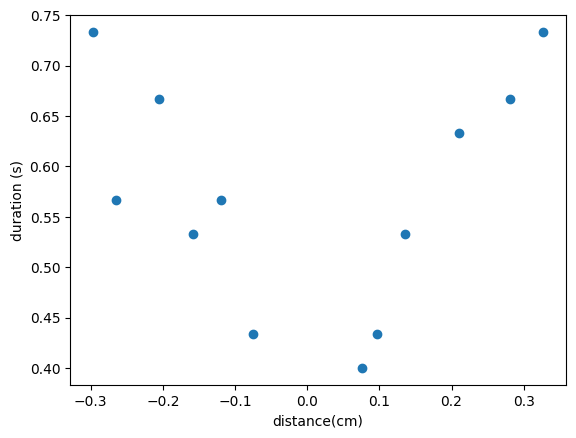

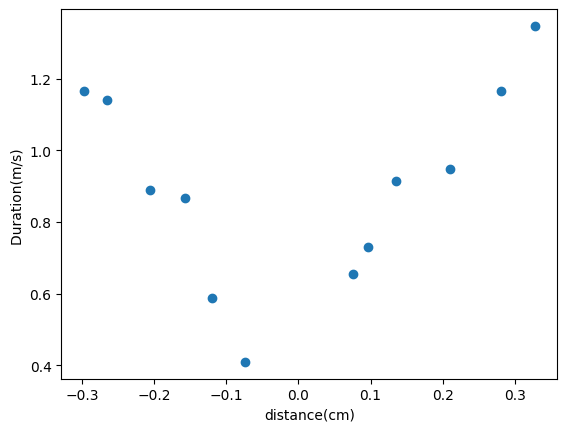

In [11]:
plt.plot(total_distances, durations, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(total_distances, peakspeeds/1000, 'o')
plt.xlabel('distance(cm)')
plt.ylabel('Duration(m/s) ')
plt.show()

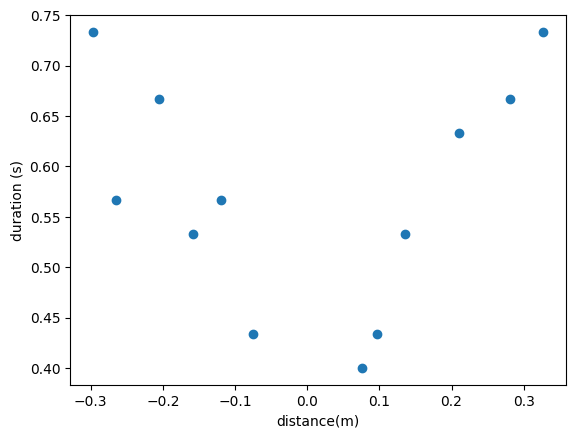

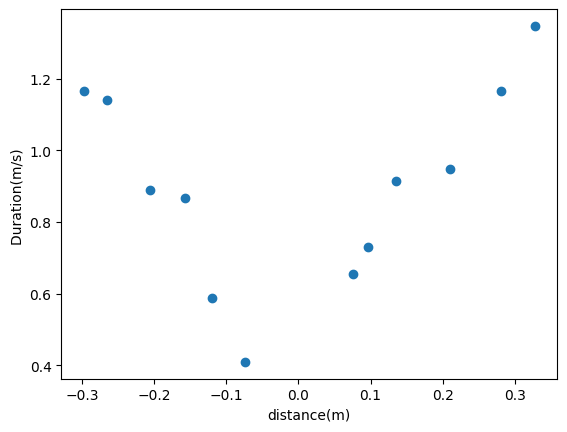

In [12]:
plt.plot(total_distances, durations, 'o')
plt.xlabel('distance(m)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(total_distances, peakspeeds/1000, 'o')
plt.xlabel('distance(m)')
plt.ylabel('Duration(m/s) ')
plt.show()

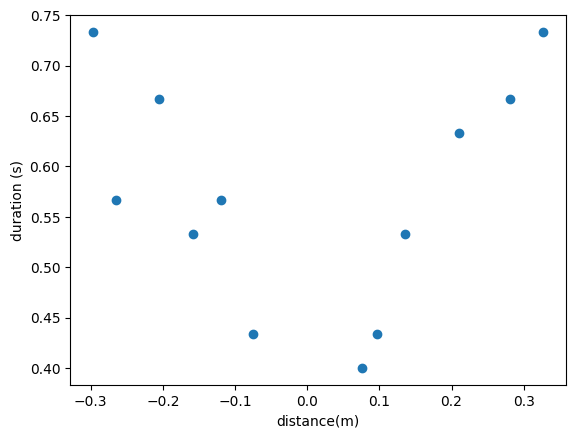

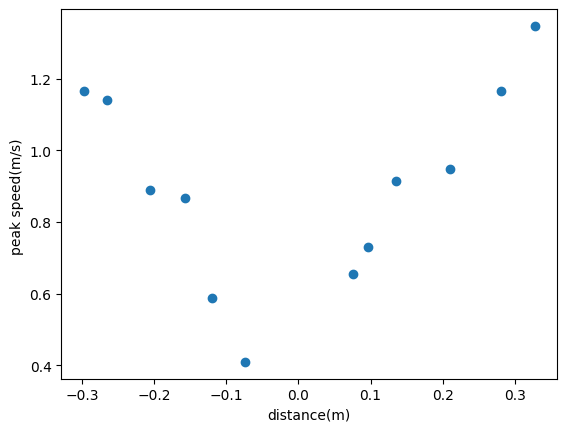

In [13]:
plt.plot(total_distances, durations, 'o')
plt.xlabel('distance(m)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(total_distances, peakspeeds/1000, 'o')
plt.xlabel('distance(m)')
plt.ylabel('peak speed(m/s) ')
plt.show()

In [14]:
vectors = []
total_distances = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000
    # Calculate the vector from start to end
  vector = tgt_end/1000 - tgt_start/1000
  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)

print(total_distances)
print(vectors)

[-0.15763315723547544, 0.13555534424955296, -0.20537758180497967, 0.2097399528009274, -0.07455250183695306, 0.07545547710282419, -0.2974083123409148, 0.327452244075392, -0.12008649710319608, 0.09705875809887976, -0.2653811894379179, 0.28118322090060843]
[array([-0.15856225, -0.15772119, -0.01435619]), array([0.13730575, 0.13607777, 0.01008043]), array([-0.19919861, -0.20710107, -0.03779964]), array([0.18485923, 0.21111217, 0.03440497]), array([-0.0575559 , -0.07421741, -0.0106629 ]), array([0.08244204, 0.07560583, 0.00226514]), array([-0.31247675, -0.30348629, -0.07245451]), array([0.30841683, 0.33079985, 0.09886021]), array([-0.1014738 , -0.11953093, -0.01597147]), array([0.10697931, 0.09654002, 0.01330796]), array([-0.23667218, -0.26647194, -0.06943939]), array([0.25392137, 0.28191701, 0.06850073])]


In [15]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000
    # Calculate the vector from start to end
  vector = tgt_end/1000 - tgt_start/1000

  magnitude = np.linalg.norm(vector)
  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitudes)
print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
distance [-0.15763315723547544, 0.13555534424955296, -0.20537758180497967, 0.2097399528009274, -0.07455250183695306, 0.07545547710282419, -0.2974083123409148, 0.327452244075392, -0.12008649710319608, 0.09705875809887976, -0.2653811894379179, 0.28118322090060843]


In [16]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000
    # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  magnitude = np.linalg.norm(vector/1000)
  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitudes)
print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
distance [-0.15763315723547544, 0.13555534424955296, -0.20537758180497967, 0.2097399528009274, -0.07455250183695306, 0.07545547710282419, -0.2974083123409148, 0.327452244075392, -0.12008649710319608, 0.09705875809887976, -0.2653811894379179, 0.28118322090060843]


In [17]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]
  tgt_end = reachr.wri_f[:,inds[-1]]
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance/1000 - start_distance/1000
  # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  magnitude = np.linalg.norm(vector/1000)
  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  # Append the magnitude to the list
  magnitudes.append(magnitude)  # Corrected line

print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [0.22410724880713406, 0.19357593782475724, 0.28982710748116386, 0.28271007244761237, 0.09452302454874141, 0.11188414452581573, 0.4415827259299545, 0.46295013110504213, 0.15760603797990527, 0.14471230590179063, 0.3631016999110486, 0.38554586169491195]
distance [-0.15763315723547544, 0.13555534424955296, -0.20537758180497967, 0.2097399528009274, -0.07455250183695306, 0.07545547710282419, -0.2974083123409148, 0.327452244075392, -0.12008649710319608, 0.09705875809887976, -0.2653811894379179, 0.28118322090060843]


In [18]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]] / 1000
  tgt_end = reachr.wri_f[:,inds[-1]] / 1000
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance - start_distance
  # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  magnitude = np.linalg.norm(vector)
  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitude)

print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [0.22410724880713406, 0.1935759378247574, 0.2898271074811641, 0.2827100724476123, 0.09452302454874138, 0.11188414452581569, 0.4415827259299545, 0.46295013110504213, 0.15760603797990502, 0.14471230590179052, 0.3631016999110489, 0.38554586169491173]
distance [-0.15763315723547455, 0.13555534424955384, -0.20537758180497923, 0.20973995280092783, -0.07455250183695306, 0.07545547710282463, -0.2974083123409139, 0.3274522440753924, -0.12008649710319563, 0.09705875809887976, -0.26538118943791833, 0.28118322090060843]


In [19]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]] / 1000
  tgt_end = reachr.wri_f[:,inds[-1]] / 1000
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  # Calculate the magnitude of the vector
  magnitude = np.linalg.norm(vector)
  
  # The total distance is the same as the magnitude
  total = magnitude

  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitude)

print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [0.22410724880713406, 0.1935759378247574, 0.2898271074811641, 0.2827100724476123, 0.09452302454874138, 0.11188414452581569, 0.4415827259299545, 0.46295013110504213, 0.15760603797990502, 0.14471230590179052, 0.3631016999110489, 0.38554586169491173]
distance [0.22410724880713406, 0.1935759378247574, 0.2898271074811641, 0.2827100724476123, 0.09452302454874138, 0.11188414452581569, 0.4415827259299545, 0.46295013110504213, 0.15760603797990502, 0.14471230590179052, 0.3631016999110489, 0.38554586169491173]


In [20]:
vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]] / 1000
  tgt_end = reachr.wri_f[:,inds[-1]] / 1000
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance - start_distance
  # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  # The magnitude is the same as the total distance
  magnitude = total

  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitude)

print('magnitudes',magnitudes)
print('distance', total_distances)

magnitudes [-0.15763315723547455, 0.13555534424955384, -0.20537758180497923, 0.20973995280092783, -0.07455250183695306, 0.07545547710282463, -0.2974083123409139, 0.3274522440753924, -0.12008649710319563, 0.09705875809887976, -0.26538118943791833, 0.28118322090060843]
distance [-0.15763315723547455, 0.13555534424955384, -0.20537758180497923, 0.20973995280092783, -0.07455250183695306, 0.07545547710282463, -0.2974083123409139, 0.3274522440753924, -0.12008649710319563, 0.09705875809887976, -0.26538118943791833, 0.28118322090060843]


c:\code\Freemocap566\reachTask\processed_clicks\ro_0125_Y_savedclicks.csv


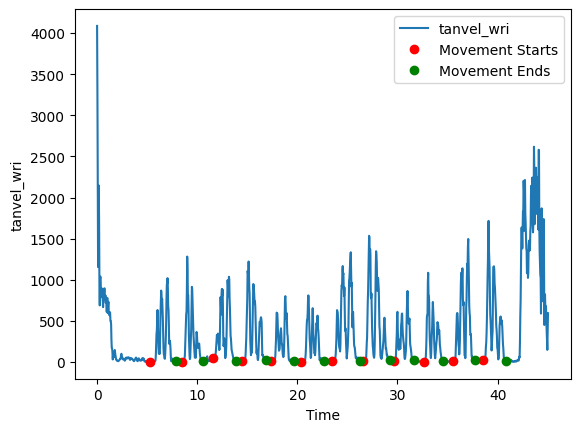

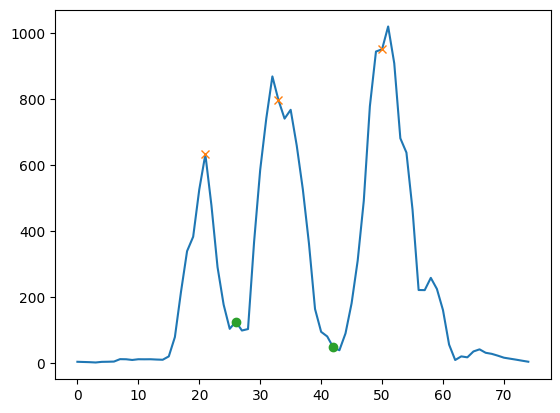

[21 33 50] [26 42]


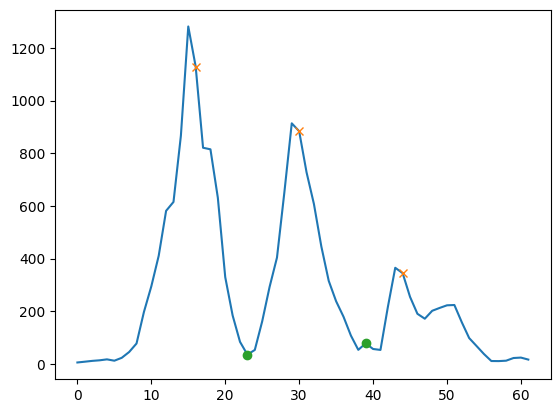

[16 30 44] [23 39]


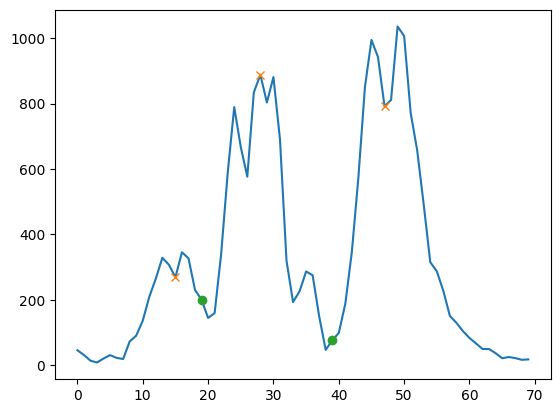

[15 28 47] [19 39]


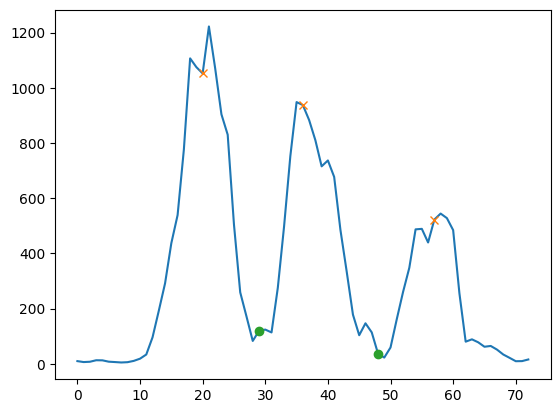

[20 36 57] [29 48]


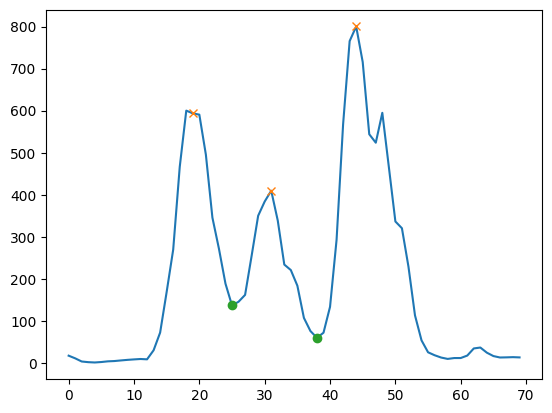

[19 31 44] [25 38]


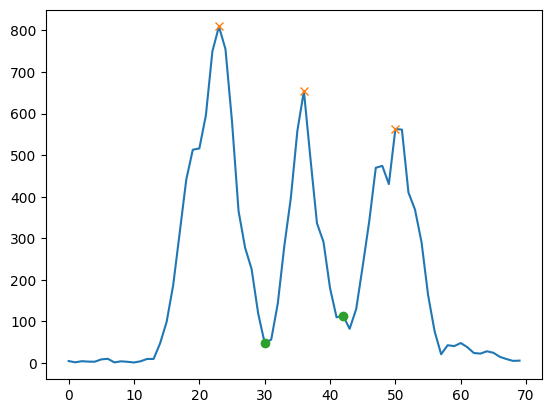

[23 36 50] [30 42]


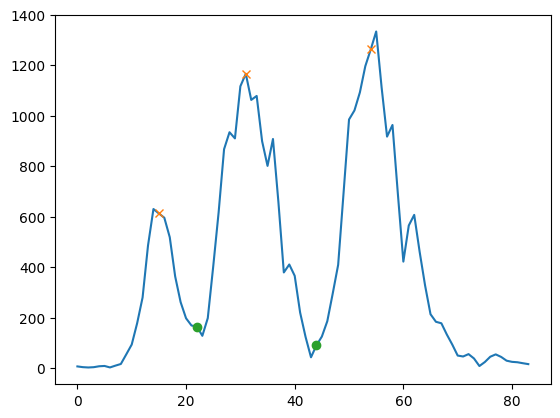

[15 31 54] [22 44]


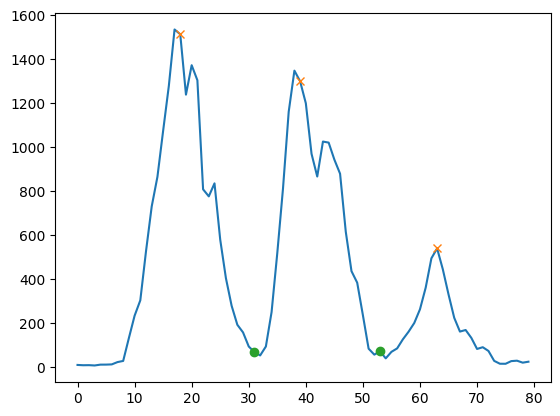

[18 39 63] [31 53]


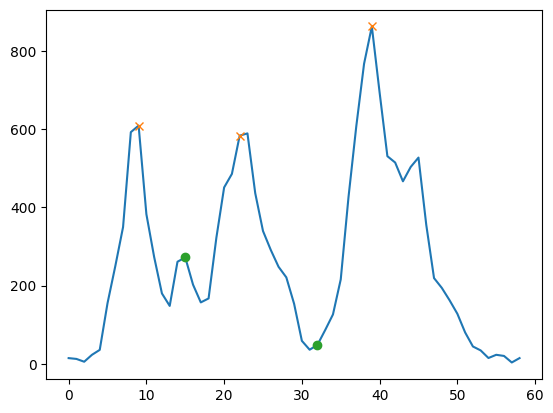

[ 9 22 39] [15 32]


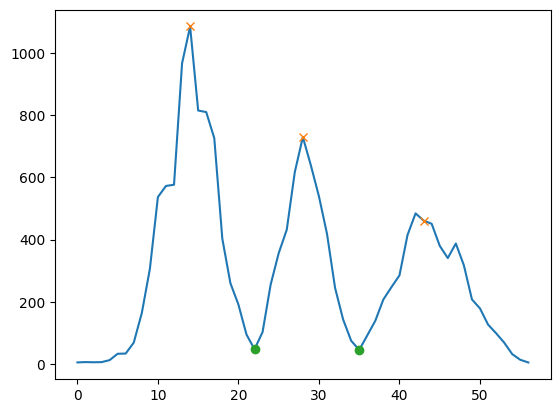

[14 28 43] [22 35]


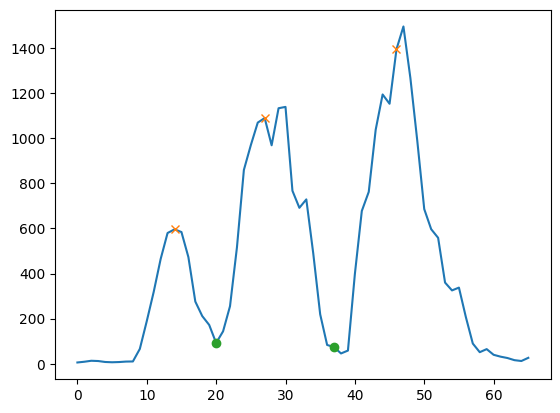

[14 27 46] [20 37]


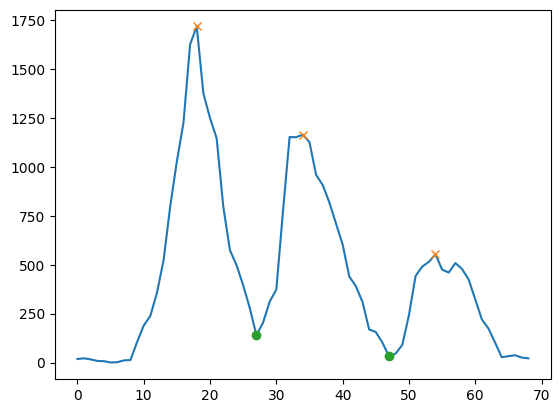

[18 34 54] [27 47]


(0.0, 1.5)

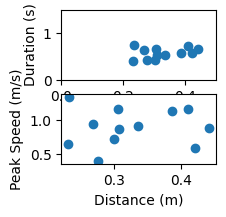

In [21]:
import math
import sys, os
sys.path.append(os.path.join(os.getcwd()))
import freemocapAnalysis as fa
import reach_fmc as rf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy.signal import find_peaks
# %matplotlib widget
# then you can do importlib.reload(rf) to reload the module

## here are hopefully the only two things you need to set.
sname = 'ro_0125_Y' # at the moment, 'je' and 'ro' are the only clean datasets that i can tell. and ro is short. 
datapath = fa.setdatapath("rom") 
## /here are hopefully the only two things you need to set.

fnames = fa.get_list_subject_files(sname,datapath)
pddata = pd.read_csv(fnames[0])
reachr = rf.reachData(pddata)

# click the starts and ends
reachr.click_add_wrist_starts_ends(numclicks=24,sname=sname)

# plot the return values
plt.plot(reachr.time,reachr.tanvel_wri)
plt.plot(reachr.time[reachr.mov_starts], reachr.tanvel_wri[reachr.mov_starts], 'ro')
plt.plot(reachr.time[reachr.mov_ends], reachr.tanvel_wri[reachr.mov_ends], 'go')
plt.xlabel('Time')
plt.ylabel('tanvel_wri')
plt.legend(['tanvel_wri', 'Movement Starts', 'Movement Ends'])
plt.show()

# call reach_fmc.peaks_and_valleys to find the peaks and valleys of the mov_starts and mov_ends
distances,durations,peakspeeds, ind_mmoves = reachr.mainsequence()

#% plot the dist peakspeed
fig,ax = plt.subplots(2,1)
#set plot size
fig.set_size_inches(2,2)
ax[0].plot(distances/1000.0,durations,'o')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Duration (s)')
#set xlimit
ax[0].set_xlim([0,.5])
ax[0].set_ylim([0,1.0])
ax[1].plot(distances/1000,peakspeeds/1000,'o')
ax[1].set_xlabel('Distance (m)')
ax[1].set_ylabel('Peak Speed (m/s)')
ax[0].set_xlim([0,0.5])
ax[0].set_ylim([0,1.5])
#%

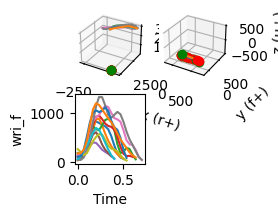

In [22]:
# plot wri_f[0,mov_starts[i]:mov_ends[i]] for all mov_starts
fig = plt.figure()
fig.set_size_inches(2,2)
tv_sm = fa.lowpass(reachr.tanvel_wri, fs=30, cutoff_freq = 8)
tgts = list()
ax_3d    = fig.add_subplot(221,projection='3d')
ax_3dr  = fig.add_subplot(222,projection='3d')
ax_tv   = fig.add_subplot(223) 

vectors = []
total_distances = []
magnitudes = []

for i in range(len(reachr.mov_starts)):
  
  ind_m = ind_mmoves[i]
  inds = range(ind_m[0],ind_m[1])
  ax_3d.plot(reachr.wri_f[0,inds], reachr.wri_f[1,inds], reachr.wri_f[2,inds])
  
  tgt_start = reachr.wri_f[:,inds[0]]/1000
  tgt_end = reachr.wri_f[:,inds[-1]]/1000
  ax_3d.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3d.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  
  x, y, z = tgt_start
  start_distance = math.sqrt(x**2 + y**2 + z**2)
  x2, y2, z2 = tgt_end
  end_distance = math.sqrt(x2**2 + y2**2 + z2**2)
  total = end_distance - start_distance
  # Calculate the vector from start to end
  vector = tgt_end - tgt_start

  # The magnitude is the same as the total distance
  magnitude = total

  # Append the total to the list
  total_distances.append(total)

  # Append the vector to the list
  vectors.append(vector)
  magnitudes.append(magnitude)
  
  R2calxy = np.array([[-0.689578  , -0.72413109, -0.01078618],
       [ 0.66407996, -0.62631008, -0.40833013],
       [ 0.28892905, -0.28873836,  0.9127706 ]])
  
  # zero the movements to the first shoulder position
  sho0 = reachr.sho_f[:,reachr.mov_starts[0:1]]
  wri_f = reachr.wri_f[:,inds]
  wri_f = wri_f - sho0
  # now rotate the vectors
  wri_r = np.dot(R2calxy,wri_f)
  ax_3dr.plot(wri_r[0,:], wri_r[1,:], wri_r[2,:])
  tgt_start = wri_r[:,0]
  tgt_end = wri_r[:,-1]
  ax_3dr.plot(tgt_start[0], tgt_start[1], tgt_start[2], 'ro')
  ax_3dr.plot(tgt_end[0], tgt_end[1], tgt_end[2], 'go')
  ax_3dr.set_xlabel('x (r+)')
  ax_3dr.set_ylabel('y (f+)')
  ax_3dr.set_zlabel('z (u+)')
  ax_3dr.set_xlim([-200,800])
  ax_3dr.set_ylim([-200,800])
  ax_3dr.set_zlim([-500,500])

  t = reachr.time[inds]
  t = t-t[0]
  
  ax_tv.plot(t,tv_sm[inds])
  
plt.xlabel('Time')
plt.ylabel('wri_f')
plt.show()

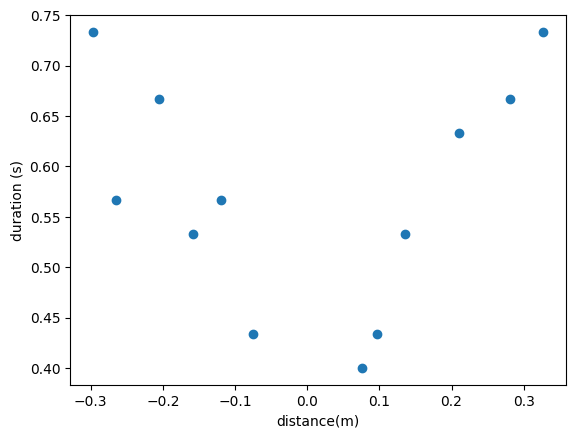

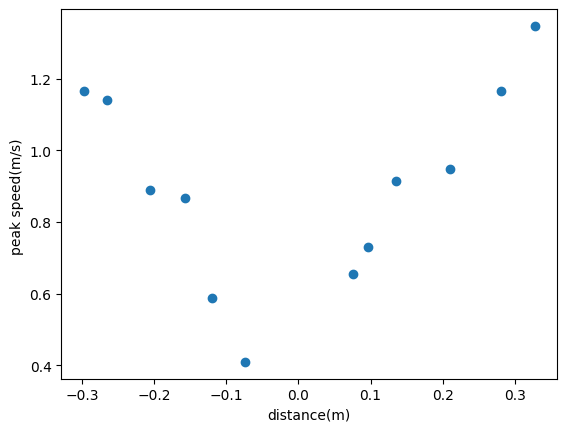

In [23]:
plt.plot(magnitudes, durations, 'o')
plt.xlabel('distance(m)')
plt.ylabel('duration (s)')
plt.show()
plt.plot(magnitudes, peakspeeds/1000, 'o')
plt.xlabel('distance(m)')
plt.ylabel('peak speed(m/s) ')
plt.show()